<a href="https://colab.research.google.com/github/Bavya25/Data-Analysis-projects/blob/main/Data_Analysis_projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# covid -19 analysis

Data loading and Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
import seaborn as sns
x=pd.read_csv("/content/covid_19_clean_complete.csv.zip")
print(x)

      Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  R

Exploraotry Data Analysis(EDA)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
x.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


Checking for missing values

In [ ]:
print(x.isnull())

       Province/State  Country/Region    Lat   Long   Date  Confirmed  Deaths  \
0                True           False  False  False  False      False   False   
1                True           False  False  False  False      False   False   
2                True           False  False  False  False      False   False   
3                True           False  False  False  False      False   False   
4                True           False  False  False  False      False   False   
...               ...             ...    ...    ...    ...        ...     ...   
49063            True           False  False  False  False      False   False   
49064            True           False  False  False  False      False   False   
49065            True           False  False  False  False      False   False   
49066            True           False  False  False  False      False   False   
49067            True           False  False  False  False      False   False   

       Recovered  Active  W

In [ ]:
print(x.isnull().sum())

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


Enhanced Visualizations

In [ ]:
# Latest data for each country
import plotly.express as px # import the library
latest_data = x[x['Date'] == x['Date'].max()] # Changed df to x

fig = px.choropleth(latest_data,
                    locations="Country/Region",
                    locationmode="country names",
                    color="Confirmed",
                    hover_name="Country/Region",
                    color_continuous_scale="Reds",
                    title="Global Spread of COVID-19")
fig.show()

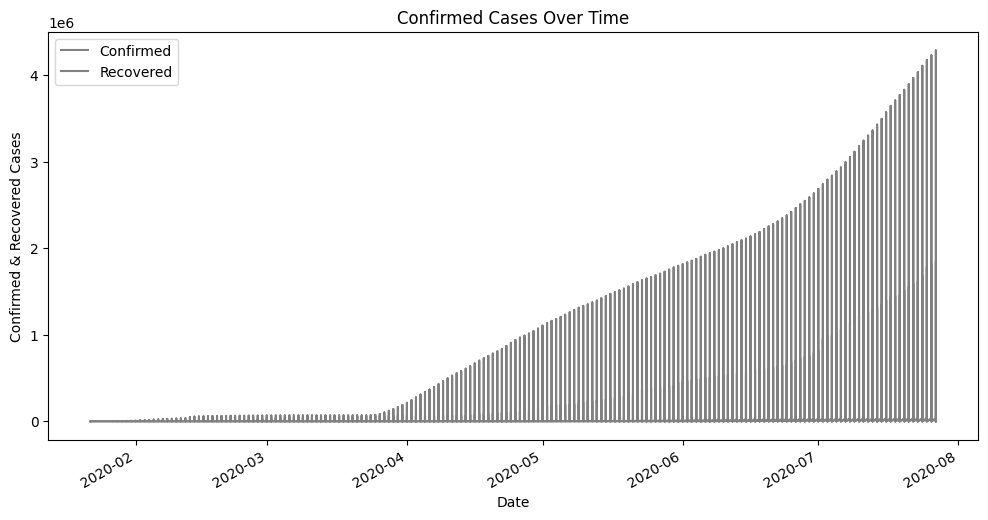

In [22]:
a=x.plot(kind="line",x="Date",y=["Confirmed","Recovered"],color="grey",figsize=(12,6))
plt.ylabel("Confirmed & Recovered Cases")
plt.xlabel("Date")
plt.title("Confirmed Cases Over Time")
plt.show()

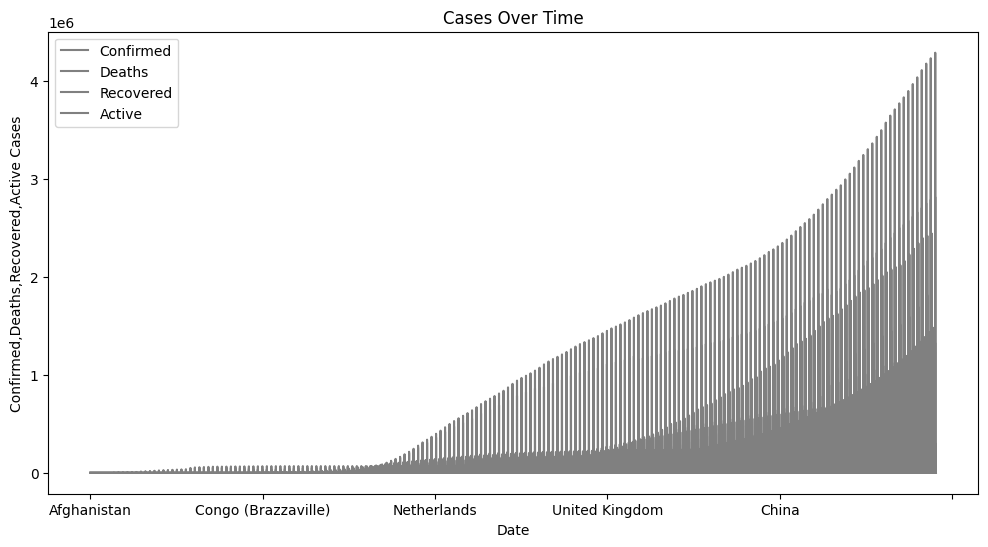

In [24]:
b=x.plot(kind="line",x="Country/Region",y=["Confirmed","Deaths","Recovered","Active"],color="grey",figsize=(12,6))
plt.ylabel("Confirmed,Deaths,Recovered,Active Cases")
plt.xlabel("Date")
plt.title("Cases Over Time")
plt.show()


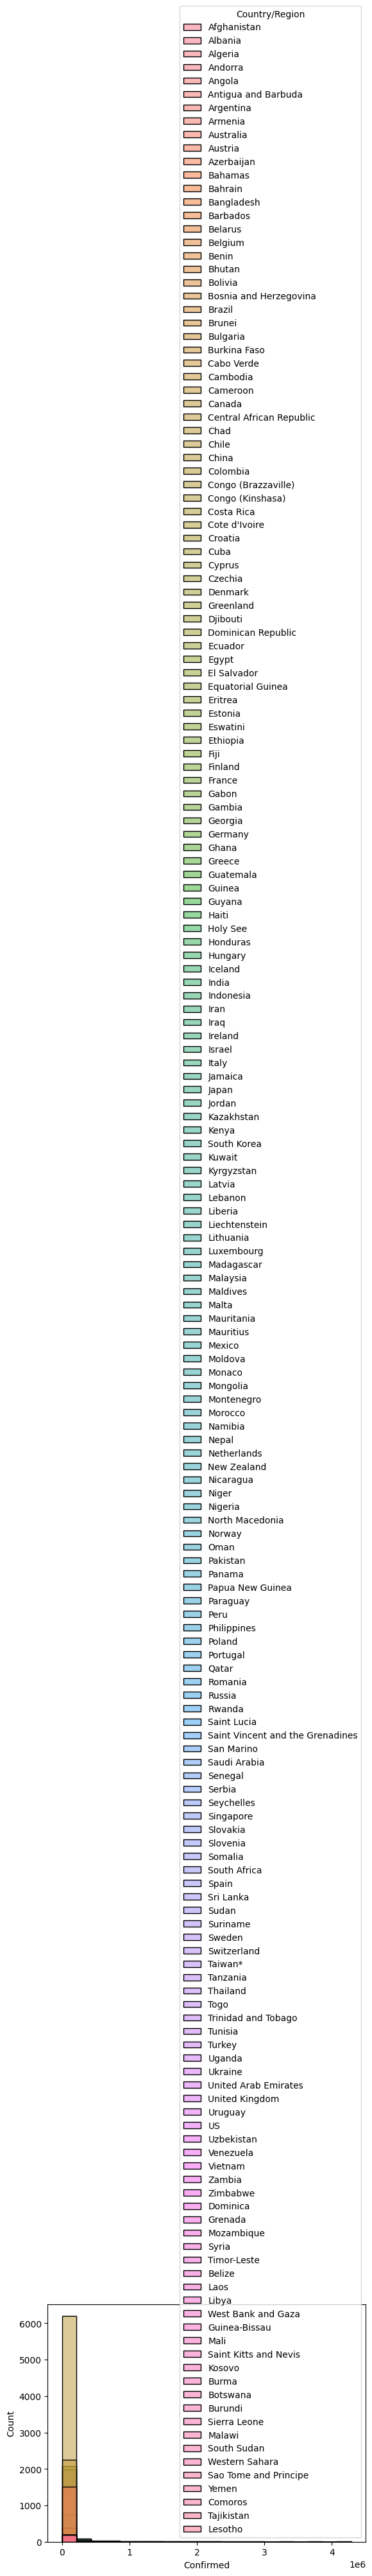

In [ ]:
sns.histplot(data=x,x="Confirmed",bins=20,hue="Country/Region")
plt.show()

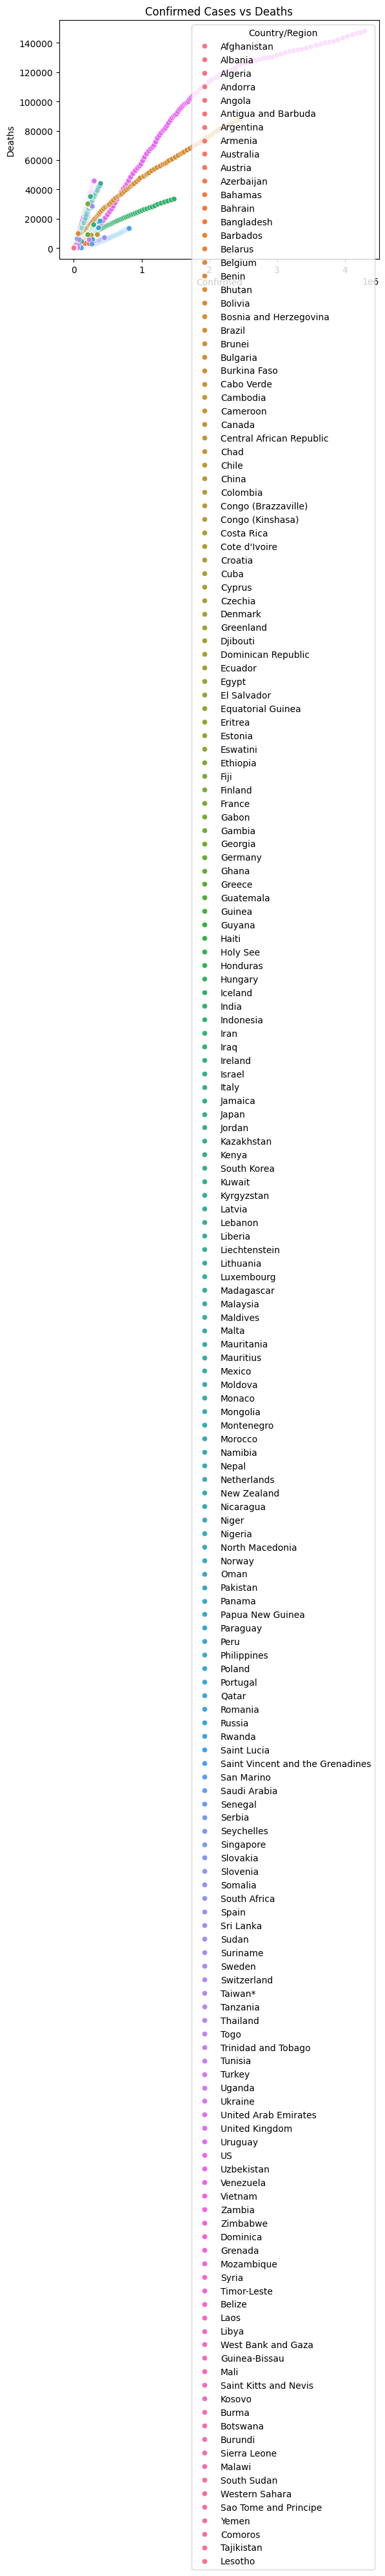

In [ ]:
sns.scatterplot(data=x,x="Confirmed",y="Deaths",hue="Country/Region")
plt.title("Confirmed Cases vs Deaths")
plt.show()

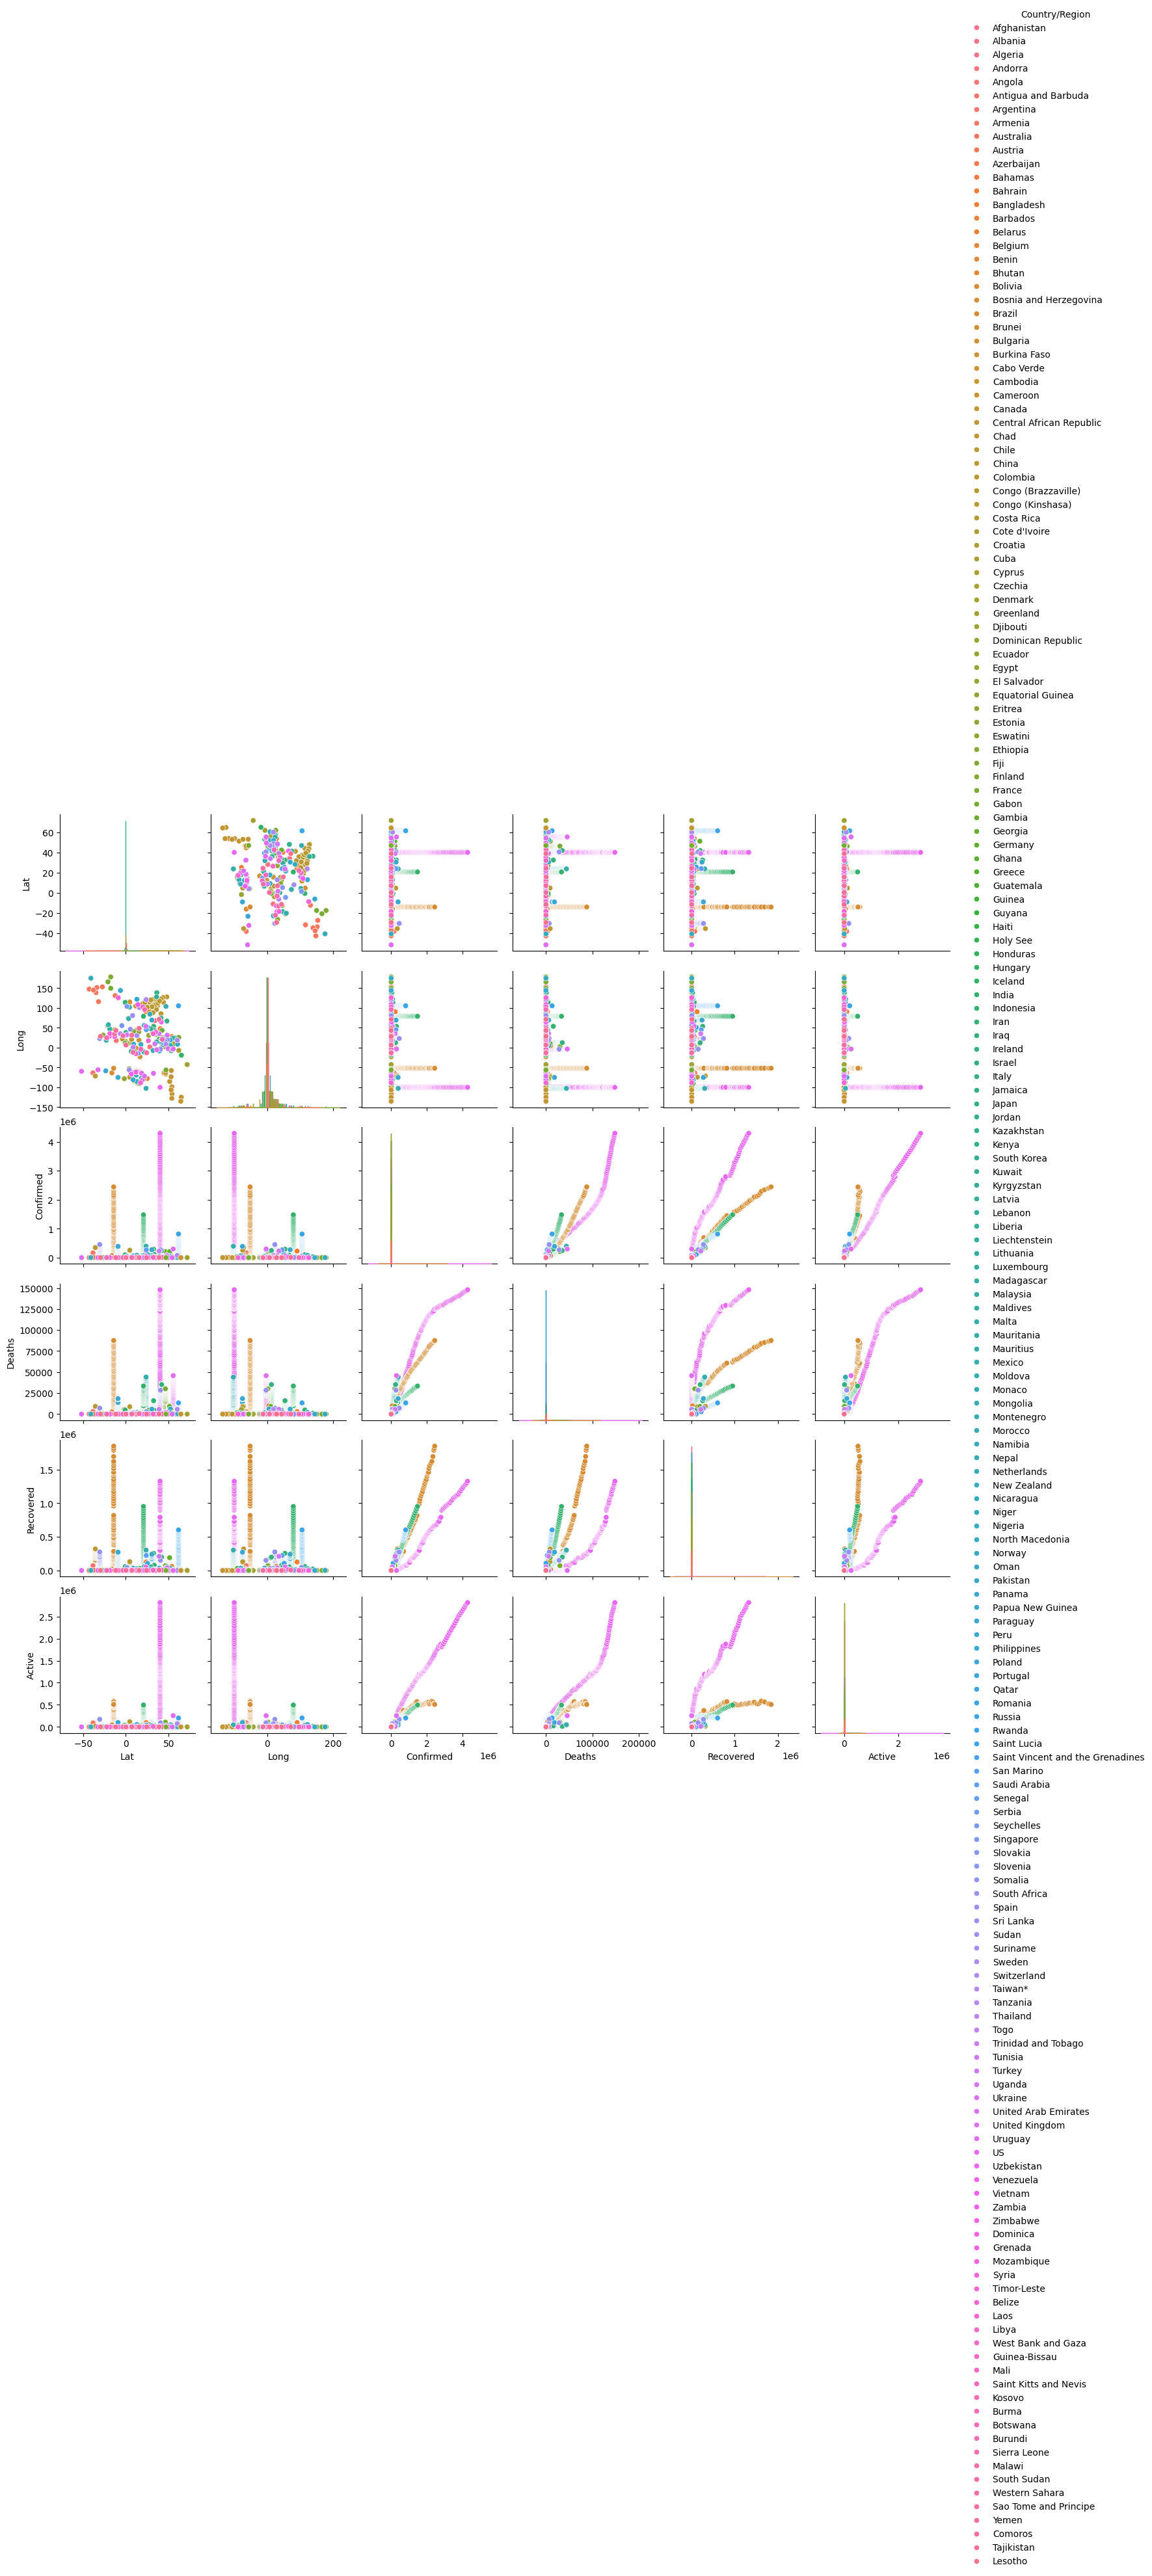

In [ ]:
sns.pairplot(x,hue="Country/Region")
plt.show()

In [4]:
specific_date = '2020-06-01'
before_date = x[x['Date'] < specific_date]
after_date = x[x['Date'] >= specific_date]

total_before = before_date['Confirmed'].sum()
total_after = after_date['Confirmed'].sum()

print(f"Total Confirmed Cases Before {specific_date}: {total_before}")
print(f"Total Confirmed Cases After {specific_date}: {total_after}")


Total Confirmed Cases Before 2020-06-01: 219086847
Total Confirmed Cases After 2020-06-01: 609421635


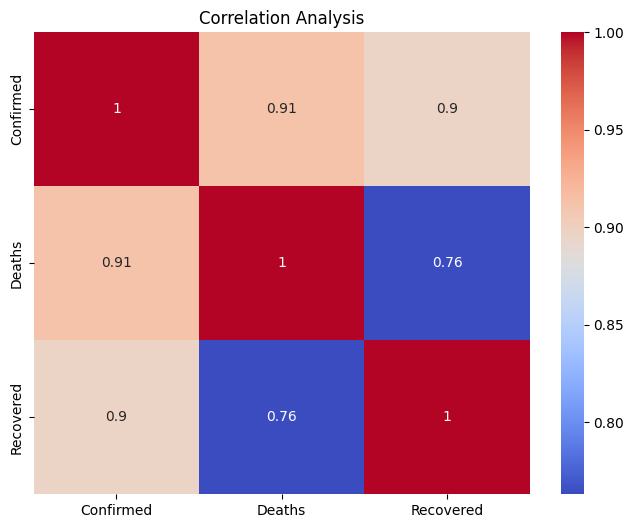

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = x[['Confirmed', 'Deaths', 'Recovered']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()


In [14]:
x["Month"]=x["Date"].dt.month
print(x["Month"])
f=x.groupby("Month")["Confirmed"].sum()
print(f)


0        1
1        1
2        1
3        1
4        1
        ..
49063    7
49064    7
49065    7
49066    7
49067    7
Name: Month, Length: 49068, dtype: int32
Month
1        38534
2      1663437
3      9002815
4     63391662
5    144990399
6    246525787
7    362895848
Name: Confirmed, dtype: int64


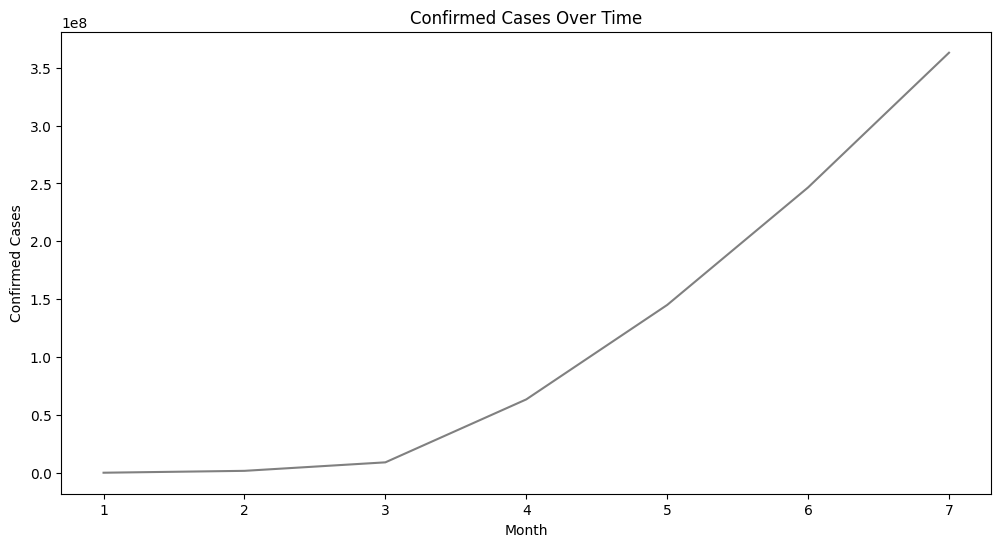

In [17]:
g=f.plot(kind="line",x="Month",y="Confirmed",color="grey",figsize=(12,6))
plt.ylabel("Confirmed Cases")
plt.xlabel("Month")
plt.title("Confirmed Cases Over Time")
plt.show()

0        1
1        1
2        1
3        1
4        1
        ..
49063    7
49064    7
49065    7
49066    7
49067    7
Name: Month, Length: 49068, dtype: int32


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting relevant features and target
X = x[['Confirmed', 'Recovered']]  # Features (you can include more features if available)
y = x['Deaths']  # Target variable we want to predict

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying the results
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 6175189.943377754
R² Score: 0.8654383659047808


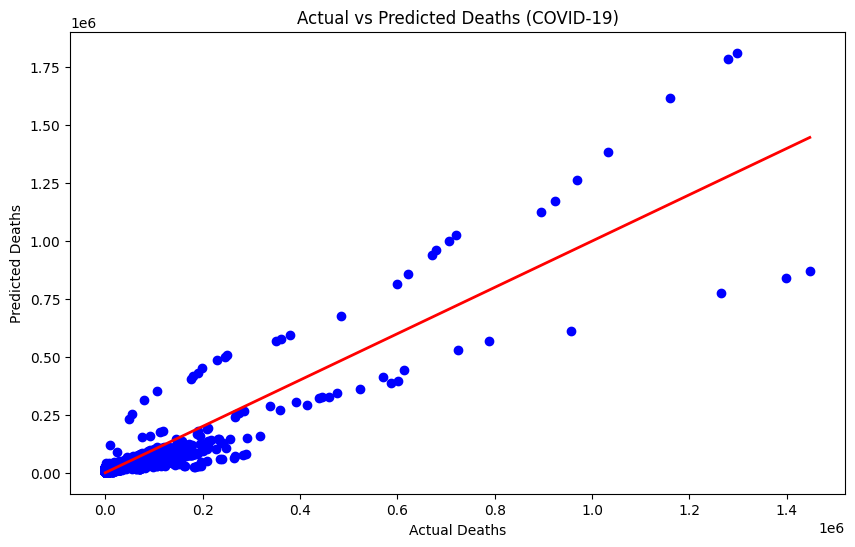

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Deaths')
plt.ylabel('Predicted Deaths')
plt.title('Actual vs Predicted Deaths (COVID-19)')
plt.show()
